In [1]:
from gintsieve import *
import primesieve.numpy as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from collections import defaultdict
import plotly.express as px
import plotly.graph_objects as go

In [10]:
block = gprimes_block(10 ** 8, 0, 200, 200)
block[0] -= block.x
#block.plot()

bools = np.full((block.dx, block.dy), False)
for i in range(block.shape[1]):
    a, b = block[0, i], block[1, i]
    bools[a][b] = True
    
distance = 5.0
close_points = []
for u in range(-int(distance), int(distance) + 1):
    for v in range(-int(distance), int(distance) + 1):
        if u ** 2 + v ** 2 <= distance ** 2 and (u or v):  # not both zero
            close_points.append((u, v))
            
edges = []
neighbors = defaultdict(list)  # coordinates of node are key, value is list of neighbors
for i in range(block.shape[1]):
    a, b = block[0, i], block[1, i]
    for u, v in close_points:
        s, t = a + u, b + v
        if 0 <= s < block.dx and 0 <= t < block.dy and bools[s][t]:
            edges.append([(a, b), (s, t)])
            neighbors[(a, b)].append((s, t))
            
g_primes = []
for i in range(block.shape[1]):
    a, b = block[0, i], block[1, i]
    g_primes.append((a, b))

visited = {}
for tup in g_primes:
    visited[tup] = False;



def dfs_component(p, component):
    visited[p] = True
    component.append(p)
    for q in neighbors[p]:
        if not visited[q]:
            dfs_component(q, component)
    


components = []
for p in g_primes:
    if not visited[p]:
        component = []
        dfs_component(p, component)
        components.append(component[:])  # making a copy

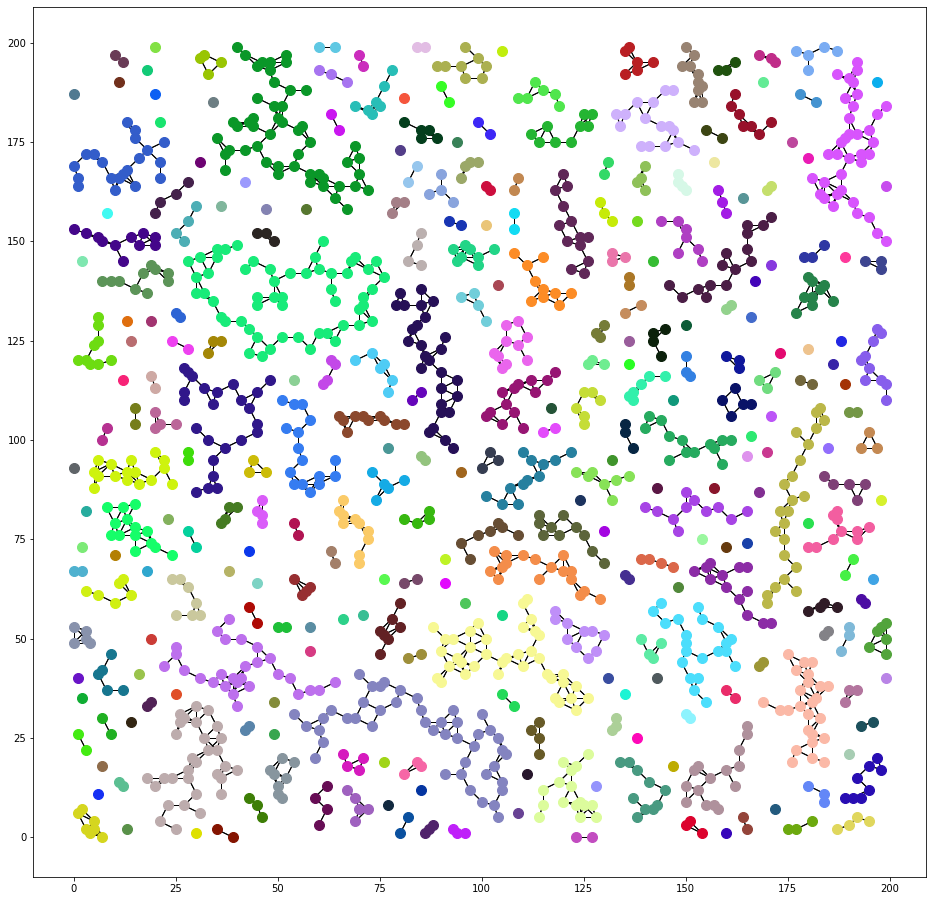

In [11]:
fig, ax = plt.subplots(figsize=(16, 16))
for component in components:
    x, y = list(zip(*component))  # zipping and unpacking
    color = np.random.rand(3, )
    ax.plot(x, y, color=color, linestyle='', marker='o', markersize=2000 / max(block.dx, block.dy))
    
lc = mc.LineCollection(edges, color='black', linewidth=1)
ax.add_collection(lc)
plt.show()

In [288]:
to_explore = []
explored = []
for i in range(block.shape[1]):
    a, b = block[0, i], block[1, i]
    if a < distance or b > block.dy - distance:
        to_explore.append((a, b))
        bools[a][b] = False

In [289]:
count = 0
while to_explore:
    a, b = to_explore.pop()
    for u, v in neighbors:
        s, t = a + u, b + v
        if 0 <= s < block.dx and 0 <= t < block.dy and bools[s][t]:
            to_explore.append((s, t))
            bools[s][t] = False
    explored.append((a, b))
    count += 1
    if count % 100:
        print('.', end='')
    else:
        print('.')
            

........................................................................................

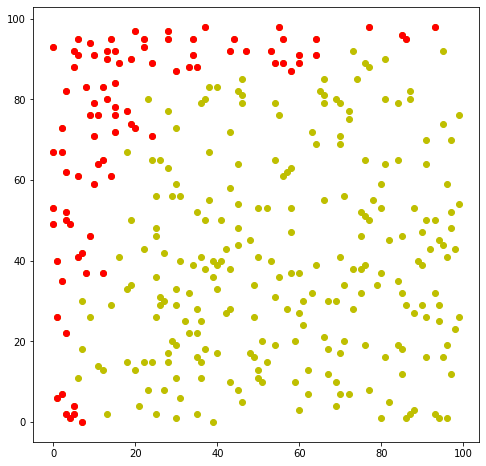

In [290]:
plt.subplots(figsize=(8, 8))
plt.plot(block[0], block[1], 'yo')
plt.plot([tup[0] for tup in explored], [tup[1] for tup in explored], 'ro')

In [ ]:
# See page 30 https://thekeep.eiu.edu/theses/2467/

Looking at connected component sizes for rational primes.

In [6]:
x = 10 ** 12
y = 4 * 10 ** 6

def get_component_sizes(gaps, dist):
    a = np.where(gaps <= dist, 1, 0)
    a_ext = np.concatenate(([0], a, [0]))
    idx = np.nonzero(a_ext[1:] != a_ext[:-1])[0]
    a_ext[1:][idx[1::2]] = idx[::2] - idx[1::2]  # redefining
    a_cum = a_ext.cumsum()
    idx = np.where(a_cum == 0)[0]  # redefining
    return a_cum[idx[1:] - 1] + 1


p = ps.primes(x, x + y)
gaps = np.diff(p)
dist = 4
component_sizes = get_component_sizes(gaps, dist ** 2)



gp = gprimes_block(10 ** 6, 0, 2 * 10 ** 3, 2 * 10 ** 3)
gp[0] -= gp.x
gp[1] -= gp.y

bools = np.full((gp.dx, gp.dy), False)
for i in range(gp.shape[1]):
    a, b = gp[0, i], gp[1, i]
    bools[a][b] = True
    
close_points = []
for u in range(-int(dist), int(dist) + 1):
    for v in range(-int(dist), int(dist) + 1):
        if u ** 2 + v ** 2 <= dist ** 2 and (u or v):  # not both zero
            close_points.append((u, v))
            
edges = []
neighbors = defaultdict(list)  # coordinates of node are key, value is list of neighbors
for i in range(gp.shape[1]):
    a, b = gp[0, i], gp[1, i]
    for u, v in close_points:
        s, t = a + u, b + v
        if 0 <= s < gp.dx and 0 <= t < gp.dy and bools[s][t]:
            edges.append([(a, b), (s, t)])
            neighbors[(a, b)].append((s, t))
            
g_primes = []
for i in range(gp.shape[1]):
    a, b = gp[0, i], gp[1, i]
    g_primes.append((a, b))

visited = {}
for tup in g_primes:
    visited[tup] = False;



def dfs_component(p, component):
    visited[p] = True
    component.append(p)
    for q in neighbors[p]:
        if not visited[q]:
            dfs_component(q, component)
    


g_components = []
for p in g_primes:
    if not visited[p]:
        component = []
        dfs_component(p, component)
        g_components.append(component[:])  # making a copy
        
g_component_sizes = [len(component) for component in g_components]

In [8]:
x0 = component_sizes
x1 = g_component_sizes

fig = go.Figure()
#fig.add_trace(go.Histogram(x=x0, name='rational primes'))
fig.add_trace(go.Histogram(x=x1, name='gaussian primes'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [7]:
g_component_sizes

[3,
 1,
 1,
 4,
 10,
 2,
 3,
 3,
 2,
 1,
 1,
 7,
 5,
 5,
 5,
 1,
 1,
 2,
 1,
 7,
 7,
 2,
 3,
 24,
 5,
 2,
 5,
 1,
 18,
 5,
 13,
 2,
 1,
 3,
 3,
 6,
 15,
 2,
 3,
 10,
 2,
 2,
 6,
 4,
 1,
 2,
 17,
 3,
 3,
 2,
 5,
 5,
 1,
 1,
 29,
 2,
 3,
 1,
 2,
 1,
 5,
 3,
 1,
 9,
 1,
 11,
 4,
 2,
 2,
 1,
 5,
 2,
 3,
 3,
 4,
 1,
 5,
 1,
 1,
 4,
 9,
 1,
 1,
 1,
 14,
 9,
 1,
 2,
 3,
 6,
 3,
 6,
 6,
 1,
 10,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 10,
 8,
 1,
 2,
 7,
 10,
 18,
 4,
 9,
 1,
 6,
 5,
 1,
 1,
 3,
 4,
 1,
 3,
 3,
 3,
 10,
 9,
 4,
 1,
 2,
 1,
 1,
 16,
 2,
 5,
 2,
 3,
 1,
 1,
 5,
 1,
 1,
 19,
 1,
 1,
 3,
 1,
 24,
 1,
 1,
 2,
 5,
 1,
 2,
 1,
 4,
 2,
 6,
 1,
 2,
 7,
 1,
 3,
 1,
 1,
 11,
 4,
 1,
 5,
 4,
 3,
 1,
 1,
 4,
 18,
 4,
 1,
 1,
 4,
 4,
 6,
 1,
 4,
 12,
 2,
 1,
 1,
 1,
 3,
 8,
 1,
 1,
 4,
 2,
 2,
 8,
 1,
 2,
 3,
 2,
 9,
 6,
 2,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 9,
 1,
 1,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 5,
 3,
 4,
 4,
 1,
 4,
 12,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 7,
 3,
 3,
 1,
 1,
 1,
 3